# FINAL PROJECT

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Import dataset

In [274]:
df_train = pd.read_csv('train.txt', sep=",")
df_test = pd.read_csv('test.txt', sep=",")

### EDA

In [275]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [276]:
df_train.shape

(614, 13)

In [277]:
df_test.shape

(367, 12)

In [278]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [279]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Univariate Analysis

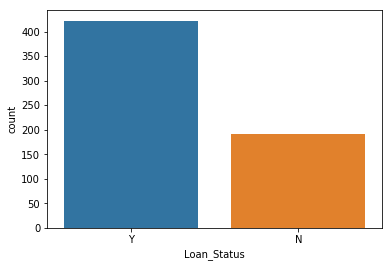

In [280]:
import seaborn as sns
sns.countplot(df_train['Loan_Status'],label="Count")
# The loan of 422(around 69%) people out of 614 was approved.

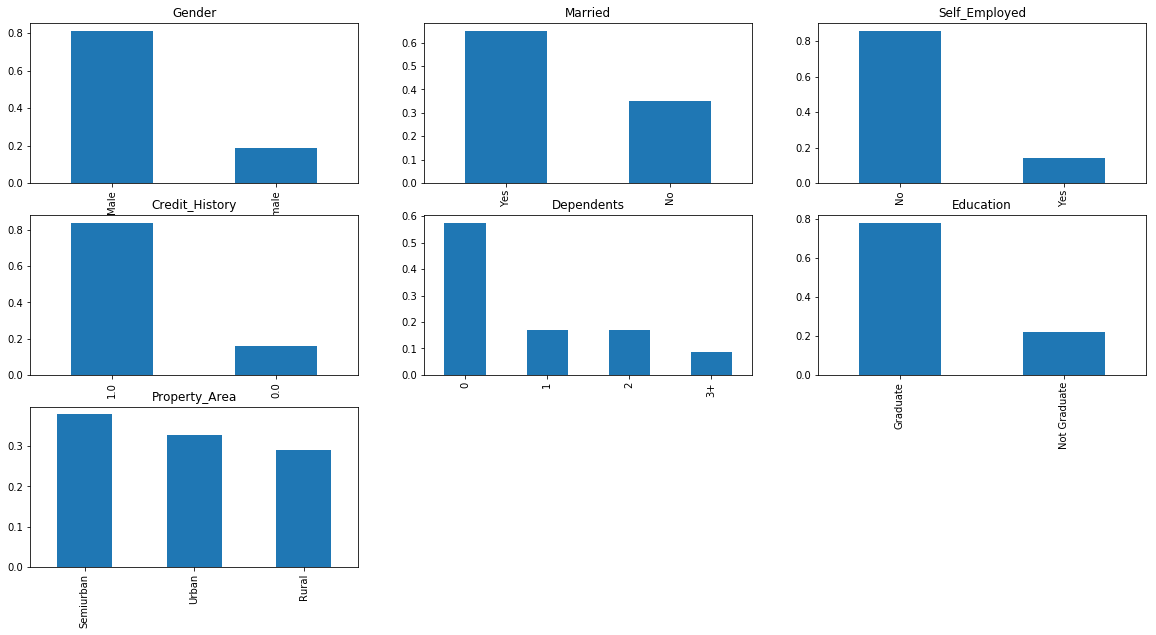

In [281]:
# Independent Variable (Categorical)
plt.figure(1) 
plt.subplot(331) 
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(332) 
df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(333) 
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(334) 
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.subplot(335) 
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents') 
plt.subplot(336) 
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(337) 
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()
# 80% applicants in the dataset are male.
# Around 65% of the applicants in the dataset are married.
# Around 15% applicants in the dataset are self employed.
# Around 85% applicants have repaid their debts.
# Most of the applicants don’t have any dependents.
# Around 80% of the applicants are Graduate.
# Most of the applicants are from Semiurban area.

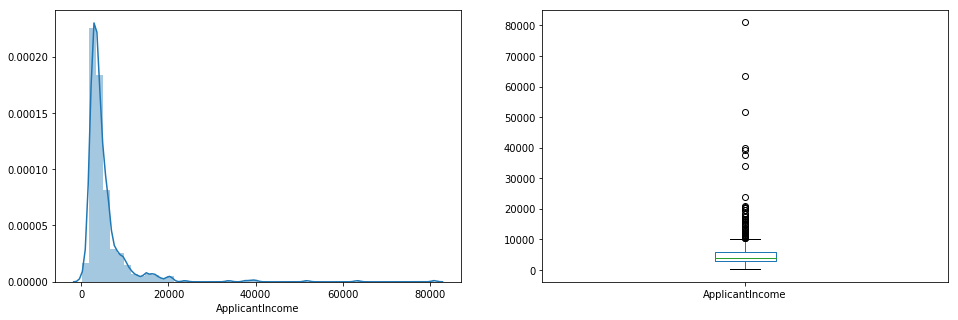

In [282]:
# Distribution of Applicant income 
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['ApplicantIncome']); 
plt.subplot(122) 
df_train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
# The boxplot confirms the presence of a lot of outliers/extreme values, 
# maybe because we are looking at people with different education levels.

Text(0.5, 0.98, '')

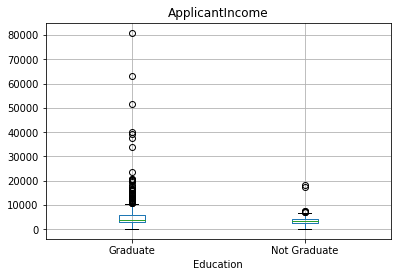

In [283]:
# ApplicantIncome by Education
df_train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")
# We can see that there are a higher number of graduates with very high incomes,
# which are appearing to be the outliers.

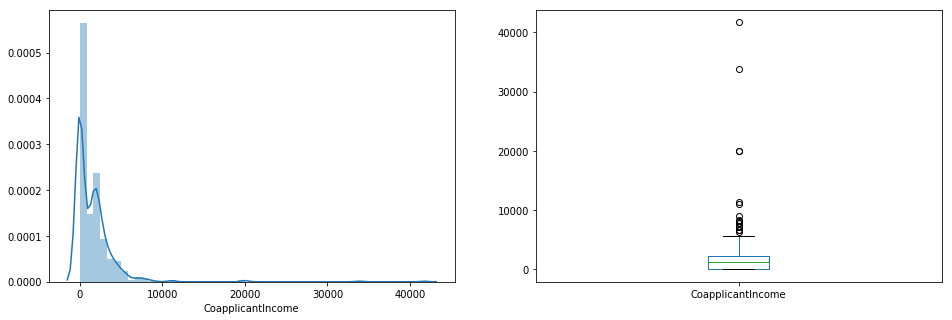

In [284]:
# Distribution of Coapplicant income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['CoapplicantIncome']); 
plt.subplot(122) 
df_train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
# We can see a similar distribution as the applicant income with outliers, and the distibution is not normally

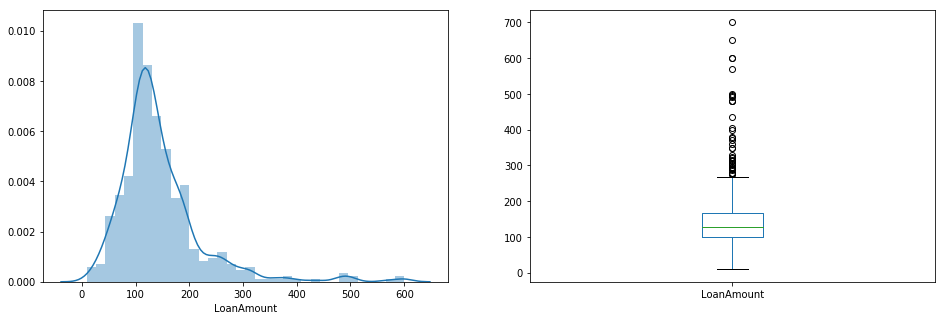

In [285]:
# Distribution of LoanAmount variable
plt.figure(1) 
plt.subplot(121) 
df=df_train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df_train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()
# We can see a lot of outliers and the distribution is normally

### Bivariate Analysis

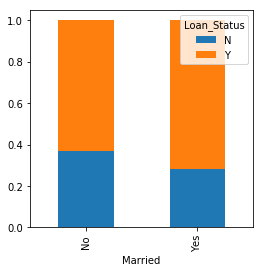

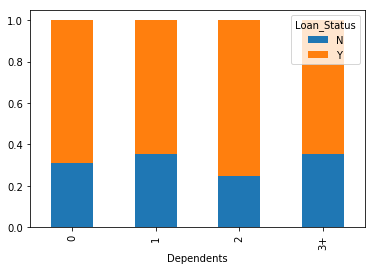

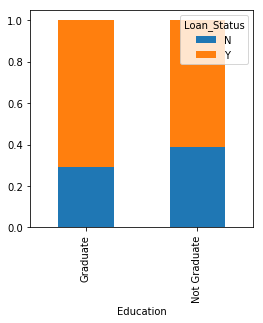

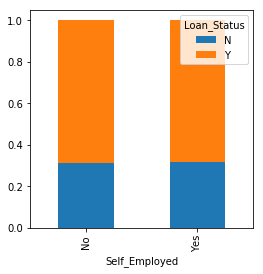

In [286]:
# Stacked bar plot of categoricals variables (only useful)
# GENDER VS LOAN_STATUS
Married=pd.crosstab(df_train['Married'], df_train['Loan_Status']) 
Dependents=pd.crosstab(df_train['Dependents'], df_train['Loan_Status']) 
Education=pd.crosstab(df_train['Education'], df_train['Loan_Status'])
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
# It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.
# Proportion of 2 dependents is higher for the approved loans.
# Proportion of Graduate applicants is higher for the approved loans.
# There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

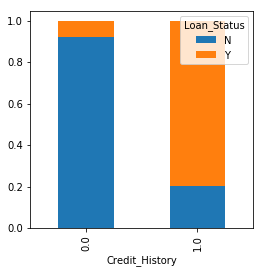

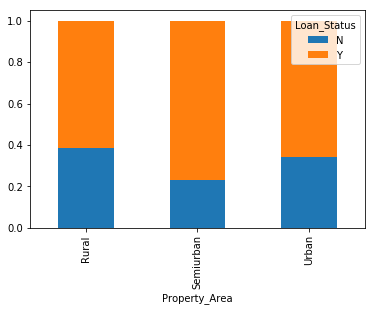

In [287]:
Credit_History=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']) 
Property_Area=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
# It seems people with credit history as 1 are more likely to get their loans approved.
# Proportion of loans getting approved in semiurban area is higher as compared to rural or urban areas.

In [288]:
df_train['Dependents'].replace('3+', 3,inplace=True) 
df_test['Dependents'].replace('3+', 3,inplace=True) 
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

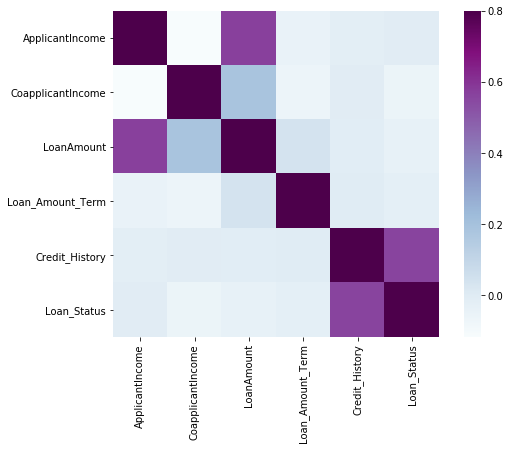

In [289]:
# Heat map to visualize the correlation
matrix = df_train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");
# We see that the most correlated variables are:
# (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 
# LoanAmount is also correlated with CoapplicantIncome.

### Taking care of missing values for df_train

In [290]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [291]:
#Imputing Missing values with mean for continuous variable
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_train['ApplicantIncome'].fillna(df_train['ApplicantIncome'].mean(), inplace=True)
df_train['CoapplicantIncome'].fillna(df_train['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Education'].fillna(df_train['Education'].mode()[0], inplace=True)
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Property_Area'].fillna(df_train['Property_Area'].mode()[0], inplace=True)

df_train['LoanAmount'] = round(df_train['LoanAmount'],0)
df_train['Loan_Amount_Term'] = round(df_train['Loan_Amount_Term'],0)

In [292]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [293]:
# Encoding categorical data but i'll use get_dummies to encode "Property_Area"
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Credit_History','Gender','Married','Education','Self_Employed']
for var in cat_cols:
    labelencoder = LabelEncoder()
    df_train[var] = labelencoder.fit_transform(df_train[var])

In [294]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,Urban,1


In [295]:
df_train.shape

(614, 13)

### Taking care of missing values for df_test

In [296]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [297]:
#Imputing Missing values with mean for continuous variable
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace=True)
df_test['ApplicantIncome'].fillna(df_test['ApplicantIncome'].mean(), inplace=True)
df_test['CoapplicantIncome'].fillna(df_test['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)
df_test['Education'].fillna(df_test['Education'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)
df_test['Property_Area'].fillna(df_test['Property_Area'].mode()[0], inplace=True)

df_test['LoanAmount'] = round(df_test['LoanAmount'],0)
df_test['Loan_Amount_Term'] = round(df_test['Loan_Amount_Term'],0)

In [298]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [299]:
df_test = df_test.iloc[:, 1:]

In [300]:
# Encoding categorical data
cat_cols = ['Credit_History','Gender','Married','Education','Self_Employed']
for var in cat_cols:
    labelencoder = LabelEncoder()
    df_test[var] = labelencoder.fit_transform(df_test[var])
#df_test = pd.get_dummies(df_test)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,Urban
1,1,1,1,0,0,3076,1500,126.0,360.0,1,Urban
2,1,1,2,0,0,5000,1800,208.0,360.0,1,Urban
3,1,1,2,0,0,2340,2546,100.0,360.0,1,Urban
4,1,0,0,1,0,3276,0,78.0,360.0,1,Urban


In [301]:
df_test.shape

(367, 11)

### Taking care of outliers for df_train

In [302]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
for i in range(0, 614):
    if df_train.at[i,'CoapplicantIncome'] > 0:
        df_train.at[i,'CoapplicantIncome_log'] = np.log(df_train.at[i,'CoapplicantIncome'])
    else:
        df_train.at[i,'CoapplicantIncome_log'] = 0
df_train['ApplicantIncome_log'] = np.log(df_train['ApplicantIncome'])

In [303]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1,Urban,1,4.983607,0.000000,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,Rural,0,4.852030,7.318540,8.430109
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,Urban,1,4.189655,0.000000,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1,4.787492,7.765569,7.856707
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,Urban,1,4.948760,0.000000,8.699515


### Taking care of outliers for df_test

In [304]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
#df_test['ApplicantIncome'] = np.log(df_test['ApplicantIncome'])
for i in range(0, 367):
    if df_test.at[i,'CoapplicantIncome'] > 0:
        df_test.at[i,'CoapplicantIncome_log'] = np.log(df_test.at[i,'CoapplicantIncome'])
    else:
        df_test.at[i,'CoapplicantIncome_log'] = 0
        
    if df_test.at[i,'ApplicantIncome'] > 0:
        df_test.at[i,'ApplicantIncome_log'] = np.log(df_test.at[i,'ApplicantIncome'])
    else:
        df_test.at[i,'ApplicantIncome_log'] = 0

In [305]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log
0,1,1,0,0,0,5720,0,110.0,360.0,1,Urban,4.700480,0.000000,8.651724
1,1,1,1,0,0,3076,1500,126.0,360.0,1,Urban,4.836282,7.313220,8.031385
2,1,1,2,0,0,5000,1800,208.0,360.0,1,Urban,5.337538,7.495542,8.517193
3,1,1,2,0,0,2340,2546,100.0,360.0,1,Urban,4.605170,7.842279,7.757906
4,1,0,0,1,0,3276,0,78.0,360.0,1,Urban,4.356709,0.000000,8.094378


### Pre-process

In [306]:
X = df_train.iloc[:, [1,2,3,4,5,9,10,11,13,14,15]]
y = df_train.iloc[:, 12]

In [307]:
X['Dependents'] = X['Dependents'].astype(str).astype(int)

In [308]:
X.dtypes

Gender                     int64
Married                    int64
Dependents                 int64
Education                  int64
Self_Employed              int64
Loan_Amount_Term         float64
Credit_History             int64
Property_Area             object
LoanAmount_log           float64
CoapplicantIncome_log    float64
ApplicantIncome_log      float64
dtype: object

In [309]:
X = pd.get_dummies(X)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,360.0,1,4.983607,0.000000,8.674026,0,0,1
1,1,1,1,0,0,360.0,1,4.852030,7.318540,8.430109,1,0,0
2,1,1,0,0,1,360.0,1,4.189655,0.000000,8.006368,0,0,1
3,1,1,0,1,0,360.0,1,4.787492,7.765569,7.856707,0,0,1
4,1,0,0,0,0,360.0,1,4.948760,0.000000,8.699515,0,0,1


In [310]:
X.shape

(614, 13)

In [311]:
#from sklearn.preprocessing import LabelEncoder
#encode_y = LabelEncoder()
#y = encode_y.fit_transform(y)

In [312]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Models Evaluation

In [313]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")


In [314]:
names = [
         "Linear SVM",
         "SVC",
         "Logistic Regression",
         "Random Forest",
         "KNN",
         "GradientBoostingClassifier",
         "Naive Bayes"
        ]
classifiers = [
    LinearSVC(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
]

In [254]:
parameters = [
              {
                  'clf__C': (np.logspace(-5, 1, 5)),
              },{
                'clf__kernel': ['rbf'], 
                'clf__gamma': [1e-3, 1e-4, 1e-5],
                'clf__C': [1, 10, 100, 1000]},
              {
                  'clf__C': (np.logspace(-3, 3, 20))
              },{
                  'clf__n_estimators' : [10, 20, 30],
                  'clf__max_depth' : [None, 6, 8, 10],
                  'clf__max_leaf_nodes': [None, 5, 10, 20],
                  'clf__min_impurity_split': [0.1, 0.2, 0.3]
              },{
                  'clf__n_neighbors': [4,5,6,7,8,9,10,11,12]
              },{
                  'clf__learning_rate': [0.3, 0.2, 0.1, 0.05, 0.01],
                  'clf__max_depth': [2,3,4,5,6],
                  'clf__subsample': [1.0, 0.8, 0.5]
              },{
                  
              }
             ]

In [112]:
scoring = ['recall', 'roc_auc', 'f1', 'accuracy']
for scores in scoring:
    for name, classifier, params in zip(names, classifiers, parameters):
        clf_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', classifier),
        ])
        gs_clf = GridSearchCV(clf_pipe, param_grid=params, cv = 10, n_jobs=-1, scoring=scores) #Stratified Kfolds
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        best_params = gs_clf.best_params_
        print("{} {}: {} params: {}".format(name,scores, score, best_params))

Linear SVM recall: 0.9777777777777777 params: {'clf__C': 0.00031622776601683794}
SVC recall: 1.0 params: {'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Logistic Regression recall: 0.9777777777777777 params: {'clf__C': 0.001}
Random Forest recall: 0.9777777777777777 params: {'clf__max_depth': 8, 'clf__max_leaf_nodes': 5, 'clf__min_impurity_split': 0.2, 'clf__n_estimators': 30}
KNN recall: 0.9777777777777777 params: {'clf__n_neighbors': 11}
GradientBoostingClassifier recall: 0.9777777777777777 params: {'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__subsample': 0.8}
Naive Bayes recall: 0.9777777777777777 params: {}
Linear SVM roc_auc: 0.8134680134680135 params: {'clf__C': 1e-05}
SVC roc_auc: 0.7737373737373737 params: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Logistic Regression roc_auc: 0.8148148148148148 params: {'clf__C': 0.001}
Random Forest roc_auc: 0.806060606060606 params: {'clf__max_depth': None, 'clf__max_leaf_nodes': 20, 'clf__min_impurity_split

## Let's take a look to all models

### Linear SVM

              precision    recall  f1-score   support

           0       0.70      0.21      0.33        33
           1       0.77      0.97      0.86        90

   micro avg       0.76      0.76      0.76       123
   macro avg       0.73      0.59      0.59       123
weighted avg       0.75      0.76      0.71       123



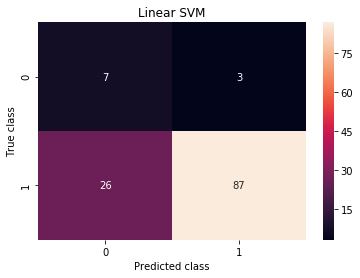

In [339]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
a = LinearSVC(C=10)
a.fit(X_train, y_train)
a_y_pred = a.predict(X_test)
a_cm = metrics.confusion_matrix(a_y_pred, y_test, [0,1])
sns.heatmap(a_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Linear SVM')
plt.savefig('linear_SVM')
print(classification_report(y_test, a.predict(X_test)))

### SVC

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.84      0.96      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.83      0.84      0.82       123



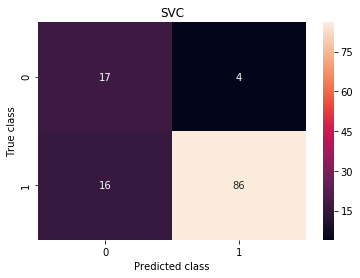

In [316]:
b = SVC(C=100, gamma=0.01, kernel='rbf')
b.fit(X_train, y_train)
b_y_pred = b.predict(X_test)
b_cm = metrics.confusion_matrix(b_y_pred, y_test, [0,1])
sns.heatmap(b_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVC')
plt.savefig('svc')
print(classification_report(y_test, b.predict(X_test)))

### Random Forest

              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.81      0.97      0.88        90

   micro avg       0.81      0.81      0.81       123
   macro avg       0.81      0.68      0.71       123
weighted avg       0.81      0.81      0.79       123



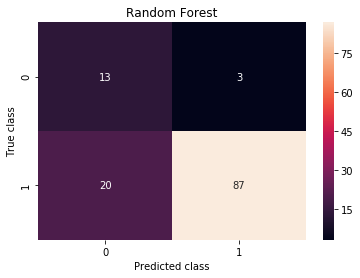

In [317]:
c = RandomForestClassifier(max_depth=5)
c.fit(X_train, y_train)
c_y_pred = c.predict(X_test)
c_cm = metrics.confusion_matrix(c_y_pred, y_test, [0,1])
sns.heatmap(c_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
print(classification_report(y_test, c.predict(X_test)))

### KNN

              precision    recall  f1-score   support

           0       0.56      0.30      0.39        33
           1       0.78      0.91      0.84        90

   micro avg       0.75      0.75      0.75       123
   macro avg       0.67      0.61      0.62       123
weighted avg       0.72      0.75      0.72       123



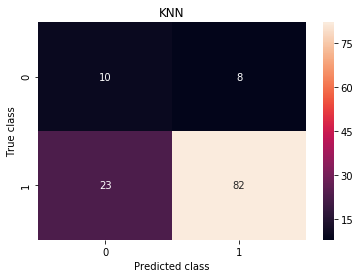

In [318]:
d = KNeighborsClassifier(n_neighbors=10)
d.fit(X_train, y_train)
d_y_pred = d.predict(X_test)
d_cm = metrics.confusion_matrix(d_y_pred, y_test, [0,1])
sns.heatmap(d_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('knn')
print(classification_report(y_test, d.predict(X_test)))

### GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

   micro avg       0.83      0.83      0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



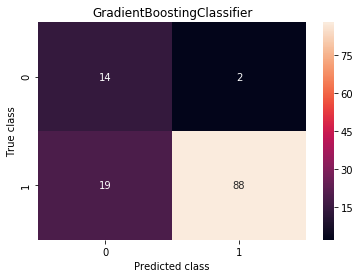

In [319]:
e = GradientBoostingClassifier(learning_rate=0.01,max_depth=2,subsample=0.5)
e.fit(X_train, y_train)
e_y_pred = e.predict(X_test)
e_cm = metrics.confusion_matrix(e_y_pred, y_test, [0,1])
sns.heatmap(e_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('GradientBoostingClassifier')
plt.savefig('GradientBoostingClassifier')
print(classification_report(y_test, e.predict(X_test)))

### Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

   micro avg       0.83      0.83      0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



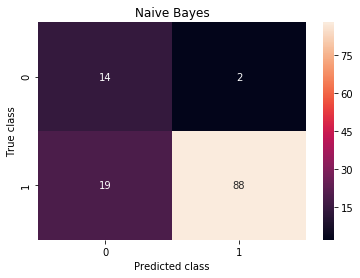

In [320]:
f = GaussianNB()
f.fit(X_train, y_train)
f_y_pred = f.predict(X_test)
f_cm = metrics.confusion_matrix(f_y_pred, y_test, [0,1])
sns.heatmap(f_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Naive Bayes')
plt.savefig('naive_bayes')
print(classification_report(y_test, f.predict(X_test)))

### Grid Search for logistic regression

In [321]:
# Create logistic regression object
logistic = LogisticRegression()
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
penalty = ['l1', 'l2']
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
C = [0.0001, 0.001, 0.01, 1, 100]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(C=C, penalty=penalty)
# Fit your model using gridsearch
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Parameters {'C': 1, 'penalty': 'l1'}
Best Penalty: l1
Best C: 1


### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

   micro avg       0.83      0.83      0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



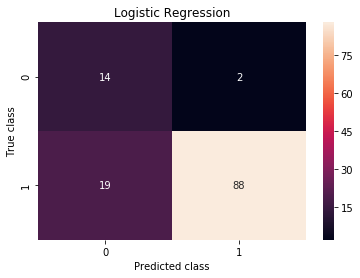

In [322]:
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_cm = metrics.confusion_matrix(lr_y_pred, y_test, [0,1])
sns.heatmap(lr_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')
print(classification_report(y_test, lr.predict(X_test)))

In [323]:
y_pred = lr.predict(X_test)
y_pred[0:20]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [324]:
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob[0:20,:]

array([[0.1619983 , 0.8380017 ],
       [0.19259192, 0.80740808],
       [0.29115386, 0.70884614],
       [0.19279315, 0.80720685],
       [0.10567401, 0.89432599],
       [0.93176036, 0.06823964],
       [0.17357542, 0.82642458],
       [0.30304749, 0.69695251],
       [0.94308637, 0.05691363],
       [0.14658692, 0.85341308],
       [0.17409628, 0.82590372],
       [0.13797569, 0.86202431],
       [0.26990815, 0.73009185],
       [0.14914693, 0.85085307],
       [0.13627318, 0.86372682],
       [0.17218933, 0.82781067],
       [0.26079745, 0.73920255],
       [0.2492845 , 0.7507155 ],
       [0.26350566, 0.73649434],
       [0.94625308, 0.05374692]])

In [325]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
accuracy = lr.score(X_test, y_test)
print("Results on the test set:\n")
print("#################")
print("Accuracy: ", round(accuracy,4))
print("Recall:   ", round(recall,4))
print("Precision:", round(prec_score,4))
print("#################")

Results on the test set:

#################
Accuracy:  0.8293
Recall:    0.9778
Precision: 0.8224
#################


### Decision functions

In [326]:
y_pred_scores = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_pred_scores[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(1, 1.6266084721265979),
 (0, 1.4367524675599792),
 (1, 0.9066190134918451),
 (0, 1.4191918898021234),
 (1, 2.1268901157848585),
 (0, -2.6083399572608106),
 (1, 1.555581523379235),
 (1, 0.8582412531268737),
 (0, -2.8117091987188902),
 (1, 1.7695222626765008),
 (1, 1.5579622863098717),
 (1, 1.835698809014712),
 (1, 1.016566588618227),
 (1, 1.7488262912099901),
 (1, 1.8185757379810266),
 (0, 1.554511368941573),
 (0, 1.0610455439062092),
 (1, 1.1138625429575426),
 (1, 1.0349071138258663),
 (0, -2.8525260011398346)]

In [327]:
y_proba_list = list(zip(y_test[0:20], y_pred_prob[0:20,1]))

# show the probability for first 20 instances
y_proba_list

[(1, 0.838001695014574),
 (0, 0.8074080835515138),
 (1, 0.7088461425103543),
 (0, 0.8072068541576278),
 (1, 0.8943259925658943),
 (0, 0.0682396390369885),
 (1, 0.8264245816296989),
 (1, 0.6969525104660439),
 (0, 0.05691363002323694),
 (1, 0.8534130776389822),
 (1, 0.8259037177066033),
 (1, 0.8620243052353384),
 (1, 0.730091845071139),
 (1, 0.8508530735576283),
 (1, 0.8637268222253018),
 (0, 0.8278106667401572),
 (0, 0.7392025546173103),
 (1, 0.7507155024803698),
 (1, 0.7364943361776255),
 (0, 0.053746917988437254)]

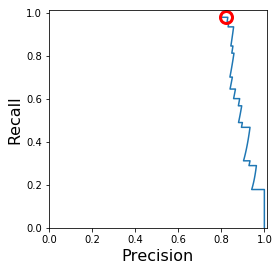

In [328]:
# Precision-recall curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

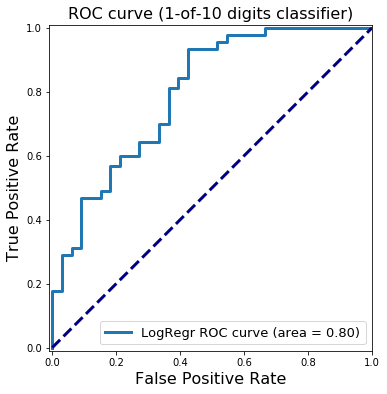

In [329]:
# ROC curves, Area-Under-Curve (AUC)
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_scores)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Make a prediction for the data test

In [330]:
df_test = df_test.iloc[:,[0,1,2,3,4,8,9,10,11,12,13]]

In [331]:
df_test['Dependents'] = df_test['Dependents'].astype(str).astype(int)

In [332]:
df_test = pd.get_dummies(df_test)

In [333]:
pred_test = lr.predict(df_test)
pred_test[0:20]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [334]:
pred_test_prob = lr.predict_proba(df_test)
pred_test_prob[0:20,:]

array([[0.22878469, 0.77121531],
       [0.19364539, 0.80635461],
       [0.21030603, 0.78969397],
       [0.16054814, 0.83945186],
       [0.32658182, 0.67341818],
       [0.30659654, 0.69340346],
       [0.19423559, 0.80576441],
       [0.94881862, 0.05118138],
       [0.21740519, 0.78259481],
       [0.2381444 , 0.7618556 ],
       [0.34366667, 0.65633333],
       [0.14860535, 0.85139465],
       [0.09860051, 0.90139949],
       [0.8599689 , 0.1400311 ],
       [0.19915004, 0.80084996],
       [0.26490239, 0.73509761],
       [0.20572024, 0.79427976],
       [0.1096626 , 0.8903374 ],
       [0.27022762, 0.72977238],
       [0.11606853, 0.88393147]])

In [335]:
df_test_final = df_test.copy()
df_test_final['Loan_Status']=pred_test
df_test_final['Loan_Status'].replace(0, 'N',inplace=True) 
df_test_final['Loan_Status'].replace(1, 'Y',inplace=True)
df_test_final.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1,1,0,0,0,360.0,1,4.700480,0.000000,8.651724,0,0,1,Y
1,1,1,1,0,0,360.0,1,4.836282,7.313220,8.031385,0,0,1,Y
2,1,1,2,0,0,360.0,1,5.337538,7.495542,8.517193,0,0,1,Y
3,1,1,2,0,0,360.0,1,4.605170,7.842279,7.757906,0,0,1,Y
4,1,0,0,1,0,360.0,1,4.356709,0.000000,8.094378,0,0,1,Y


### ANN

In [133]:
import keras

Using TensorFlow backend.


In [134]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
score_train = classifier.evaluate(X_train, y_train)
score_test = classifier.evaluate(X_test, y_test)

W0722 13:53:19.556361 4589618624 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 13:53:19.611593 4589618624 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 13:53:19.620508 4589618624 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 13:53:19.719961 4589618624 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 13:53:19.745655 4589618624 deprecation_wrapper.py:119] From /anaconda3

Epoch 1/100
491/491 [==============================] - 1s 1ms/step - loss: 0.6566 - acc: 0.6721
Epoch 2/100
491/491 [==============================] - 0s 170us/step - loss: 0.6412 - acc: 0.6762
Epoch 3/100
491/491 [==============================] - 0s 172us/step - loss: 0.6350 - acc: 0.6762
Epoch 4/100
491/491 [==============================] - 0s 189us/step - loss: 0.6352 - acc: 0.6762
Epoch 5/100
491/491 [==============================] - 0s 149us/step - loss: 0.6404 - acc: 0.6762
Epoch 6/100
491/491 [==============================] - 0s 147us/step - loss: 0.6357 - acc: 0.6762
Epoch 7/100
491/491 [==============================] - 0s 146us/step - loss: 0.6381 - acc: 0.6762
Epoch 8/100
491/491 [==============================] - 0s 144us/step - loss: 0.6414 - acc: 0.6762
Epoch 9/100
491/491 [==============================] - 0s 152us/step - loss: 0.6325 - acc: 0.6762
Epoch 10/100
491/491 [==============================] - 0s 161us/step - loss: 0.6516 - acc: 0.6762
Epoch 11/100
491/491 

In [135]:
print(score_train)
print(score_test)
# Loss and accuracy 

[0.5630228699103392, 0.7515274946655616]
[0.5232942206103627, 0.7642276369459261]


In [136]:
y_pred_ANN = classifier.predict(X_test)
y_pred_ANN = y_pred_ANN>0.5
y_pred_ANN = y_pred_ANN*1
y_pred_ANN[0:20]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

              precision    recall  f1-score   support

           0       0.83      0.15      0.26        33
           1       0.76      0.99      0.86        90

   micro avg       0.76      0.76      0.76       123
   macro avg       0.80      0.57      0.56       123
weighted avg       0.78      0.76      0.70       123



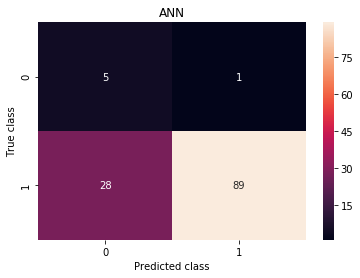

In [137]:
ANN_cm = metrics.confusion_matrix(y_pred_ANN, y_test, [0,1])
sns.heatmap(ANN_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ANN')
plt.savefig('ANN')
print(classification_report(y_test, y_pred_ANN))

### Evaluate ANN

In [138]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Build fonction
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# K-fold cros validation
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
accuracies

array([0.81999999, 0.85714285, 0.77551021, 0.83673469, 0.81632652,
       0.85714284, 0.65306123, 0.79591837, 0.85714285, 0.75510205])

In [139]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.8024081617593766
0.059980956725397314


In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [50, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

## Deploy Machine Learning models in Production as APIs (using Flask)

### Saving Machine Learning Model

In [631]:
from sklearn.externals import joblib
pickle.dump(lr, open("/Users/DG/loan-prediction/model.pkl","wb"))